Name: Lucia Adeola
Python Project 2
PostgreSQL Database Connector: Bank Project

Displayed in this notebook are the following:

Part 1: Establish Connection
- Defined function to establish connection to the bank database
- secure login credentials using a vault file
- sample queries to verify and test connection
- error handling for failed connection

Part 2: Retrieve Monthly Transactions
	•	Defined a function to retrieve all transactions for a given year and month.
	•	Used SQL with EXTRACT(YEAR FROM txn_date) and EXTRACT(MONTH FROM txn_date) to filter transactions.
	•	If no data is found, returned a dummy row with -1 values.
	•	Dropped the account_id column from the output.
	•	Tested with:
	•	Valid input 
	•	Invalid input 
    
Part 3: BankDB Python Class
	•	Built a BankDB class with three methods:
	•	__init__() — connects to the database using the vault file.
	•	get_monthly_transactions(year, month) — retrieves filtered data using SQL.
	•	transactions_barplot(year, month) — generates a bar plot of total daily transaction amounts.
	•	Verified the class works by:
	•	Creating an instance of the class.
	•	Calling the barplot method and checking the plot display.
	•	 error handling 

In [32]:
#import psycopg2
from sqlalchemy import create_engine
import psycopg2

#we will want Pandas for the data frame structure
import pandas as pd

In [33]:
#import my  connection function
from my_db_connection import connect_to_db

In [34]:
#test vault.txt
conn = connect_to_db("vault.txt")

Username: pat
Password: MyPatPass2024!


In [35]:

#load data account table from bank db
df = pd.read_sql("SELECT * FROM account LIMIT 5;", conn)
df.head()

/var/folders/xv/55j5859j0jdcbldqcylh9j4m0000gn/T/ipykernel_89612/421510635.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql("SELECT * FROM account LIMIT 5;", conn)


,account_id,product_cd,cust_id,open_date,close_date,last_activity_date,status,open_branch_id,open_emp_id,avail_balance,pending_balance,trial104
0,1,CHK,1,2000-01-15,None,2005-01-04,ACTIVE,2,10,1057.75,1057.75,T
1,2,SAV,1,2000-01-15,None,2004-12-19,ACTIVE,2,10,500.00,500.00,T
2,3,CD,1,2004-06-30,None,2004-06-30,ACTIVE,2,10,3000.00,3000.00,T
3,4,CHK,2,2001-03-12,None,2004-12-27,ACTIVE,2,10,2258.02,2258.02,T
4,5,SAV,2,2001-03-12,None,2004-12-11,ACTIVE,2,10,200.00,200.00,T


#testing with an invalid vault file name
invalid_conn = connect_to_db("bad_vault.txt")

we  recieve this error
FileNotFoundError: [Errno 2] No such file or directory: 'bad_vault.txt'

In [36]:
#import monthly transactions function
from get_my_monthly_transactions import get_month_transactions

In [37]:
pd.read_sql("SELECT * FROM transaction LIMIT 5;", conn)

/var/folders/xv/55j5859j0jdcbldqcylh9j4m0000gn/T/ipykernel_89612/431457223.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql("SELECT * FROM transaction LIMIT 5;", conn)


,txn_id,txn_date,account_id,txn_type_cd,amount,teller_emp_id,execution_branch_id,funds_avail_date,trial104
0,1,2000-01-15,1,CDT,100.0,None,None,2000-01-15,T
1,2,2000-01-15,2,CDT,100.0,None,None,2000-01-15,T
2,3,2004-06-30,3,CDT,100.0,None,None,2004-06-30,T
3,4,2001-03-12,4,CDT,100.0,None,None,2001-03-12,T
4,5,2001-03-12,5,CDT,100.0,None,None,2001-03-12,T


In [38]:
#test our transaction function
#valid year and date

transactions_df = get_month_transactions(conn, 2000,1)
transactions_df.head()

/Users/lucia/Desktop/DSE5002OM/Project 2/get_my_monthly_transactions.py:36: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  transactions_df = pd.read_sql(query, conn, params=(year, month))


,txn_id,txn_date,txn_type_cd,amount,teller_emp_id,execution_branch_id,funds_avail_date,trial104
0,1,2000-01-15,CDT,100.0,None,None,2000-01-15,T
1,2,2000-01-15,CDT,100.0,None,None,2000-01-15,T
2,9,2000-01-15,CDT,100.0,None,None,2000-01-15,T


In [39]:
#test our transaction function
#invalid year and date

transactions_df = get_month_transactions(conn, 2020,1)
transactions_df.head()

no data found for specified date, returning dummy row.


/Users/lucia/Desktop/DSE5002OM/Project 2/get_my_monthly_transactions.py:36: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  transactions_df = pd.read_sql(query, conn, params=(year, month))


,txn_id,txn_date,amount
0,-1,-1,-1


In [40]:
#test my class file for connection to db(step 5)
from my_bank_db import BankDB

check_bank = BankDB("vault.txt")

successfully connected to database


In [41]:
#test my class method get_monthly_transactions
transactions_df = bank.get_monthly_transactions(2000,1)
transactions_df.head()

/Users/lucia/Desktop/DSE5002OM/Project 2/my_bank_db.py:45: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  transactions_df = pd.read_sql(query, self.conn, params=(year, month))


,txn_id,txn_date,txn_type_cd,amount,teller_emp_id,execution_branch_id,funds_avail_date,trial104
0,1,2000-01-15,CDT,100.0,None,None,2000-01-15,T
1,2,2000-01-15,CDT,100.0,None,None,2000-01-15,T
2,9,2000-01-15,CDT,100.0,None,None,2000-01-15,T


/Users/lucia/Desktop/DSE5002OM/Project 2/my_bank_db.py:45: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  transactions_df = pd.read_sql(query, self.conn, params=(year, month))


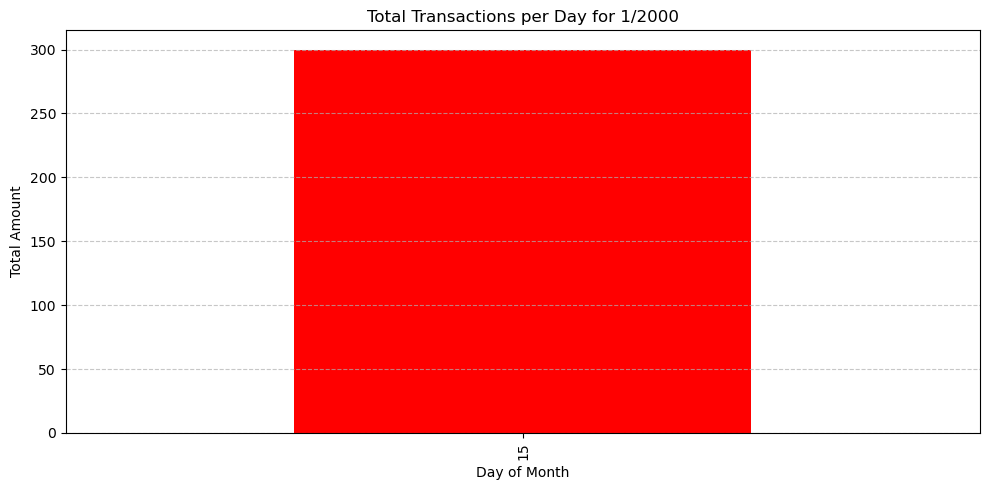

In [42]:
#create my bar plot of total transactions per day for month/year
check_bank.transactions_barplot(2000,1)